## Extra Example

In [41]:
import requests

In [42]:
from bs4 import BeautifulSoup

In [ ]:
cities = ['Berlin', 'Frankfurt', 'Leipzig']
cities

for city in cities:
    # print(f'https://en.wikipedia.org/wiki/{city}')
    url = f'https://en.wikipedia.org/wiki/{city}'
# ['https://en.wikipedia.org/wiki/{city}' for city in cities]

    response = requests.get(url, headers= {'User-Agent': 'Chrome/139.0.0.0'})
    soup = BeautifulSoup(response.content,'html.parser')
    gdp_per_capita = soup.find_all(class_='infobox-data')[-10].text
    print(f'for city: {city} the GDP per capita is {gdp_per_capita} 🤑')

for city: Berlin the GDP per capita is €53,131 (2024) 🤑
for city: Frankfurt the GDP per capita is 775,790 🤑
for city: Leipzig the GDP per capita is 297.8 km2 (115.0 sq mi) 🤑


In [107]:
url = "https://en.wikipedia.org/wiki/Berlin"
# url = "https://en.wikipedia.org/wiki/Munich"

In [108]:
response = requests.get(url, headers= {'User-Agent': 'Chrome/139.0.0.0'})
response

<Response [200]>

In [100]:
response.url

'https://en.wikipedia.org/wiki/Berlin'

In [47]:
response.status_code

200

In [54]:
response.content

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Berlin - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-featu

In [109]:
soup = BeautifulSoup(response.content,'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Berlin - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-cu

In [73]:
import regex as re

In [110]:
soup.find_all(class_='infobox-data')#[-10].text

[<td class="infobox-data">Germany</td>,
 <td class="infobox-data"><a class="mw-redirect" href="/wiki/Boroughs_and_neighborhoods_of_Berlin" title="Boroughs and neighborhoods of Berlin">Berlin</a></td>,
 <td class="infobox-data agent"><a href="/wiki/Abgeordnetenhaus_of_Berlin" title="Abgeordnetenhaus of Berlin">Abgeordnetenhaus of Berlin</a></td>,
 <td class="infobox-data"><a href="/wiki/Kai_Wegner" title="Kai Wegner">Kai Wegner</a> (<a href="/wiki/Christian_Democratic_Union_of_Germany" title="Christian Democratic Union of Germany">CDU</a>)</td>,
 <td class="infobox-data">4 (of 69)</td>,
 <td class="infobox-data"><a href="/wiki/Results_of_the_2025_German_federal_election#Berlin" title="Results of the 2025 German federal election">24 (of 630)</a> <small>(as of 2025)</small></td>,
 <td class="infobox-data">891.3 km<sup>2</sup> (344.1 sq mi)</td>,
 <td class="infobox-data">3,743 km<sup>2</sup> (1,445 sq mi)</td>,
 <td class="infobox-data">34 m (112 ft)</td>,
 <td class="infobox-data">3,596,

In [112]:
soup.find_all(string=re.compile(r"€", re.IGNORECASE))
# soup.find_all(string=re.compile(r"\b€\b", re.IGNORECASE))

['€207.058 billion (2024)',
 '€53,131 (2024)',
 'The total annual budget of Berlin in 2015 exceeded €24.5 ($30.0) billion including a budget surplus of €205 ($240) million.',
 '. The total annual federal budget managed by the German government exceeded €310 ($375) billion in 2013.',
 'In 2018, the GDP of Berlin totaled €147\xa0billion, an increase of 3.1% over the previous year.']

In [113]:
gdp_cells = soup.find_all("td", class_="infobox-data")
for cell in gdp_cells:
    text = cell.get_text(strip=True)
    # print(text)
    if re.search(r"€", text):
        print(text)

€207.058 billion (2024)
€53,131 (2024)


In [115]:
gdp_cells = soup.find_all("td", class_="infobox-data")
for cell in gdp_cells:
    text = cell.get_text(strip=True)          # strip outer whitespace
    # print("raw repr:", repr(text))            # shows hidden chars like \xa0
    # quick checks:
    if "€" in text:
        print("Found euro via simple check:", text)
    if re.search(r"€", text):
        print("Found euro via regex:", text)

Found euro via simple check: €207.058 billion (2024)
Found euro via regex: €207.058 billion (2024)
Found euro via simple check: €53,131 (2024)
Found euro via regex: €53,131 (2024)


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# 1.&nbsp; Scraping Basic Information

## 1.1.&nbsp; Scraping country, latitude and longitude of each city


### Berlin

In [27]:
# get the berlin_soup
url = 'https://www.wikipedia.org/wiki/Berlin'
headers = {'User-Agent': 'Chrome/139.0.0.0'}

response = requests.get(url , headers=headers)
response

<Response [200]>

In [28]:
berlin_soup = BeautifulSoup(response.content, 'html.parser')
berlin_soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Berlin - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-cu

> By using Google Chrome and using the developer tool (`View > Developer > Developer Tools`) we can see that the **country** is in the tag with the attribute `class` `infobox-data`.
>
> image.png

In [40]:
berlin_soup.find_all(class_='infobox-data')[6].text.split()[:2]

['891.3', 'km2']

In [30]:
berlin_soup.find(class_='latitude').get_text()

'52°31′12″N'

In [33]:
berlin_soup.find(class_='longitude').text

'13°24′18″E'

In [ ]:
berlin_soup.prettify()

In [ ]:
berlin_soup.find_all(class_="infobox-data")

As we only want the first of all of these, let's make our lives easy and use `find()` instead of `find_all()`.

In [ ]:
berlin_soup.find(class_="infobox-data")

Nice, we got the right element. Now let's extract the text:

In [ ]:
berlin_soup.find(class_="infobox-data").get_text()

And store it in a variable

In [ ]:
berlin_country = berlin_soup.find(class_="infobox-data").get_text()
berlin_country

Nice and easy! Let's extract **latitude and longitude** for Berlin.


Again, by exploring the HTML using developer tools,  we can see that the HTML tag surrounding the latitude that we want contains `<span class="latitude">`:

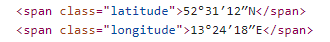


So let's use it.

In [ ]:
berlin_soup.find(class_="latitude")

Nice, we got the right element directly. Now let's extract the text:

In [ ]:
berlin_soup.find(class_="latitude").get_text()

and store it in a variable

In [ ]:
berlin_latitude = berlin_soup.find(class_="latitude").get_text()
berlin_latitude

Let's try the same for longitude

In [ ]:
berlin_longitude = berlin_soup.find(class_="longitude").get_text()
berlin_longitude

Well done! We would like to have the coordinates in decimal format later on, but for now we will focus on collection before cleaning.

### Hamburg
Let's see if the lessons we learnt from Berlin apply to Hamburg

In [ ]:
url = 'https://www.wikipedia.org/wiki/Hamburg'
headers = {'User-Agent': 'Chrome/139.0.0.0'}

response = requests.get(url, headers=headers)
hamburg_soup = BeautifulSoup(response.content, 'html.parser')

hamburg_country = hamburg_soup.find(class_="infobox-data").get_text()
hamburg_latitude = hamburg_soup.find(class_="latitude").get_text()
hamburg_longitude = hamburg_soup.find(class_="longitude").get_text()

hamburg_country, hamburg_latitude, hamburg_longitude

Fantastic the same rules apply. It's nice to find general rules like this as then you can loop through things and make your life easier. If finding the latitude and longitude for Hamburg was significantly different this could add complexity to our code. Unfortunately, web scrapping is very fragile - if someone redesigns the page, our code breaks and we have to start again - this is why APIs are preferred when they're available.

### Munich

In [ ]:
url = 'https://www.wikipedia.org/wiki/Munich'
headers = {'User-Agent': 'Chrome/139.0.0.0'}

response = requests.get(url, headers=headers)
munich_soup = BeautifulSoup(response.content, 'html.parser')

munich_country = munich_soup.find(class_="infobox-data").get_text()
munich_latitude = munich_soup.find(class_="latitude").get_text()
munich_longitude = munich_soup.find(class_="longitude").get_text()

munich_country, munich_latitude, munich_longitude


Great we've found a rule that generalises well, this helps us to automate our code with a loop.

## 1.2.&nbsp; Making a loop

In [ ]:
cities = ["Berlin", "Hamburg", "Cologne"]

countries = []
latitudes = []
longitudes = []

for city in cities:
  # get the soup for the city
  url = f"https://www.wikipedia.org/wiki/{city}"
  headers = {'User-Agent': 'Chrome/134.0.0.0'}

  response = requests.get(url, headers=headers)
  city_soup = BeautifulSoup(response.content, 'html.parser')

  # extract the data
  city_country = city_soup.find(class_="infobox-data").get_text()
  city_latitude = city_soup.find(class_="latitude").get_text()
  city_longitude = city_soup.find(class_="longitude").get_text()

  # append data to a list
  countries.append(city_country)
  latitudes.append(city_latitude)
  longitudes.append(city_longitude)

In [ ]:
print(f"The cities are in the following countries: {countries}")
print(f"The cities have the following latitudes: {latitudes}")
print(f"The cities have the following longitudes: {longitudes}")

This works well for those German cities. Great! Let's turn these lists into dataframe.

# 2.&nbsp; Data Organisation

## 2.1.&nbsp; Creating a DataFrame

In [ ]:
cities_df = pd.DataFrame({"City": cities,
                          "Country": countries,
                          "Latitude": latitudes,
                          "Longitude": longitudes})

cities_df

Nice and easy. We had our information in separate lists and now used them to create our DataFrame. Well done! However, if we add more and more columns we would need many separate lists.

There is a solution for this. Check out the next example:

In [ ]:
cities = ["Paris", "London", "Madrid"]

# create one single list to keep track of all values (instead of having separate lists)
city_data = []

for city in cities:
    url = f"https://www.wikipedia.org/wiki/{city}"
    headers = {'User-Agent': 'Chrome/134.0.0.0'}

    response = requests.get(url, headers=headers)
    city_soup = BeautifulSoup(response.content, 'html.parser')

    # extract the relevant information
    country = city_soup.find(class_="infobox-data").get_text()
    city_latitude = city_soup.find(class_="latitude").get_text()
    city_longitude = city_soup.find(class_="longitude").get_text()

    # for each city we append a dictionary of values to the list
    city_data.append({"City": city,
                     "Country": country,
                     "Latitude": city_latitude,
                     "Longitude": city_longitude
                    })

cities_df = pd.DataFrame(city_data)
cities_df


In [ ]:
kk = []


#### Feeling brave: Changing the latitude and longitude to decimal format

We will need latitude and longitude in a decimal format to retrieve information on weather and airports.There are many ways to go about it. Google around to get some ideas:
- you can write the extraction yourself and practice working with Strings and Regex or
- you can use a library that someone created for this task.

Here we will use [a python library](https://pypi.org/project/lat-lon-parser/) that converts latitude and longitude to decimal:

In [ ]:
!pip install lat-lon-parser

In [ ]:
from lat_lon_parser import parse

parse(berlin_latitude)

You can now add it to your for loop. The next section shows an example.

## 2.2.&nbsp; Looking ahead: Wrapping your code in a function

A brief reminder on functions:
- we copy our working code,
- indent it,
- and add the definition and return of the function.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from lat_lon_parser import parse    # for decimal coordinates


def cities_dataframe(cities):

  city_data = []

  for city in cities:
    url = f"https://www.wikipedia.org/wiki/{city}"
    headers = {'User-Agent': 'Chrome/134.0.0.0'}

    response = requests.get(url, headers=headers)
    city_soup = BeautifulSoup(response.content, 'html.parser')

    # extract the relevant information
    city_latitude = city_soup.find(class_="latitude").get_text()
    city_longitude = city_soup.find(class_="longitude").get_text()
    country = city_soup.find(class_="infobox-data").get_text()

    # keep track of data per city
    city_data.append({"City": city,
                    "Country": country,
                    "Latitude": parse(city_latitude), # latitude in decimal format
                    "Longitude": parse(city_longitude), # longitude in decimal format
                    })

  return pd.DataFrame(city_data)


In [ ]:
# call the function
list_of_cities = ["Berlin", "Hamburg", "Cologne"]

cities_df = cities_dataframe(list_of_cities)
cities_df

Hey, this worked great! Let's remember why we use functions: We want to be able to repeat the code many times. When we call our function with different cities, the relevant information will be extracted. This will help Gans to expand in the future.

In [ ]:
new_cities = ["Munich", "Amsterdam", "Paris"]

cities_dataframe(new_cities)

# 3.&nbsp; BONUS: Scraping Dynamic Information

## 3.1.&nbsp; Scraping population
Expand the scope of your data gathering by extracting the population of a city. This information changes over time, so we might need to add a timestamp.


> After inspecting the population we can see that the HTML tag surrounding the Population number contains no attributes to use. So let's try searching for `Population` and using the `find_next()` method.

In [ ]:
""" If we want to make our code more robust and protect against the word `population`
being by itself somewhere else on the page, we could first select the information box on the right using: """
# berlin_soup.find('table', class_='vcard').find(string="Population").find_next()`
""" The code works without it, so we'll leave it up to you whether you think this protection/enhancement makes sense. """

berlin_soup.find(string="Population").find_next()

The output doesn't look right! That's not a population!

Looking at the html again, we can see that this `div` is the next tag, but the number we want is in the next `td` tag. Let's update our code to reflect this.

In [ ]:
berlin_soup.find(string="Population").find_next("td")
# first = berlin_soup.find(string="Population")
# next = first.find_next("td")  # finds the next <td> after it

Got it that time. Now let's extract the text

In [ ]:
berlin_population = berlin_soup.find(string="Population").find_next("td").get_text()
berlin_population

And now we need to tidy the text so that it's a number and not a string.

In [ ]:
berlin_population_clean = berlin_population.replace(",", "")
berlin_population_clean

In [ ]:
berlin_population_clean = int(berlin_population_clean)
berlin_population_clean

Now that we have the population extracted, let's reuse our for loop from above and see if it also works for Hamburg and Munich. After we had a working for loop, we also add a timestamp.

In [ ]:
from datetime import datetime # to get today's date

cities = ["Berlin", "Hamburg", "Cologne"]

# create one single list to keep track of all values (instead of having separate lists)
population_data = []

for city in cities:
    url = f"https://www.wikipedia.org/wiki/{city}"
    headers = {'User-Agent': 'Chrome/134.0.0.0'}

    response = requests.get(url, headers=headers)
    city_soup = BeautifulSoup(response.content, 'html.parser')

    # extract the relevant information
    city_population = city_soup.find(string="Population").find_next("td").get_text()
    city_population_clean = city_population.replace(",", "")
    today = datetime.today().strftime("%d.%m.%Y")

    # for each city we append a dictionary of values to the list
    population_data.append({"City": city,
                     "Population": int(city_population_clean),
                     "Population_Timestamp": today
                    })

population_data = pd.DataFrame(population_data)
population_data

Excellent! The same extraction works for Hamburg and Cologne, too. And we already have a nice DataFrame to keep track of the cities' current population.

## 3.2.&nbsp; Data Organisation

Let's reuse the code and wrap it into a function.

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from datetime import datetime # to get today's date


def populations_dataframe(cities):

    population_data = []

    for city in cities:
        url = f"https://www.wikipedia.org/wiki/{city}"
        headers = {'User-Agent': 'Chrome/134.0.0.0'}

        response = requests.get(url, headers=headers)
        city_soup = BeautifulSoup(response.content, 'html.parser')

        # extract the relevant information
        city_population = city_soup.find(string="Population").find_next("td").get_text()
        city_population_clean = int(city_population.replace(",", ""))
        today = datetime.today().strftime("%d.%m.%Y")

        # keep track of data per city
        population_data.append({"City": city,
                        "Population": city_population_clean,
                        "Timestamp_Population": today
                        })

    return pd.DataFrame(population_data)

In [ ]:
# call the populations function
cities = ["Berlin", "Cologne", "Hamburg"]

population_df = populations_dataframe(cities)
population_df

This looks great. Let's see if it also works for different cities in case of Gans expansion:

# 4.&nbsp; BONUS: Global Data Scraping
This isn't necessary for this project, even though it can be a fun exercise. We won't spoil it here by giving you the answer. Come back to this at the end of the project and see if you can get a working answer.